In [274]:
#setting up 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import hvplot
from scipy.stats import linregress 
from pprint import pprint 

#importing csv data variables 
international_drug_seizures_path = "seizures_1.csv"
world_data_path = "worlddata.csv"

drug_seizures = pd.read_csv(international_drug_seizures_path)
world_data = pd.read_csv(world_data_path)

#merge data
merged = pd.merge(drug_seizures, world_data, how='outer', on='country')
merged.dropna()



,Region,country,ISO Code,Drug Group,Drug,Year,KG Equivalent,electricity_access,gdp,gdp_capita,...,air_pollution,population_density,population,alcohol_consumption,unemployment_rate,social_support,freedom,generosity,income_class,cpi
0,Africa,Algeria,DZA,Cannabis-type,Marijuana (herb),1970.0,141.00000,99.49,1.680000e+11,4117.84,...,100.0,17.10,40736509.0,0.5844,10.540,0.785,0.51,-0.182,Lower middle income,34.50
1,Africa,Algeria,DZA,Cannabis-type,Hashish (resin),1970.0,140.00000,99.49,1.680000e+11,4117.84,...,100.0,17.10,40736509.0,0.5844,10.540,0.785,0.51,-0.182,Lower middle income,34.50
2,Africa,Algeria,DZA,Cannabis-type,Marijuana (herb),1980.0,240.00000,99.49,1.680000e+11,4117.84,...,100.0,17.10,40736509.0,0.5844,10.540,0.785,0.51,-0.182,Lower middle income,34.50
3,Africa,Algeria,DZA,Opioids,Heroin,1981.0,0.40000,99.49,1.680000e+11,4117.84,...,100.0,17.10,40736509.0,0.5844,10.540,0.785,0.51,-0.182,Lower middle income,34.50
4,Africa,Algeria,DZA,Cannabis-type,Marijuana (herb),1981.0,14.00000,99.49,1.680000e+11,4117.84,...,100.0,17.10,40736509.0,0.5844,10.540,0.785,0.51,-0.182,Lower middle income,34.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51196,Asia,Bhutan,BTN,Opioids,Pharmaceutical opioids,2019.0,33.30000,98.09,2.264951e+09,3006.65,...,100.0,19.74,752813.0,0.3241,2.908,0.848,0.83,0.287,Lower middle income,66.25
51197,Asia,Bhutan,BTN,Opioids,Pharmaceutical opioids,2019.0,4.30395,98.09,2.264951e+09,3006.65,...,100.0,19.74,752813.0,0.3241,2.908,0.848,0.83,0.287,Lower middle income,66.25
51198,Asia,Bhutan,BTN,Sedatives and Tranquillizers,Benzodiazepines,2019.0,0.03264,98.09,2.264951e+09,3006.65,...,100.0,19.74,752813.0,0.3241,2.908,0.848,0.83,0.287,Lower middle income,66.25
51199,Asia,Bhutan,BTN,Substances not under international control,Plant-based NPS,2019.0,4.00000,98.09,2.264951e+09,3006.65,...,100.0,19.74,752813.0,0.3241,2.908,0.848,0.83,0.287,Lower middle income,66.25


In [232]:
#Hypothesis: Drug Seizures have increased in the last twenty years. 
#creating a data frame for drug seizures by year and weight
yearly_mean = drug_seizures['KG Equivalent'].groupby(drug_seizures['Year']).mean()
yearly_median = drug_seizures['KG Equivalent'].groupby(drug_seizures['Year']).median()
yearly_var = drug_seizures['KG Equivalent'].groupby(drug_seizures['Year']).var()
yearly_std = drug_seizures['KG Equivalent'].groupby(drug_seizures['Year']).std()
yearly_sem = drug_seizures['KG Equivalent'].groupby(drug_seizures['Year']).sem()

yearly_summary = pd.DataFrame({'Yearly Mean' : yearly_mean, 'Yearly Median' : yearly_median, 'Yearly Variance': yearly_var, 'Yearly Std. Dev.' : yearly_std, 'Yearly Std. Err' : yearly_sem })
yearly_summary

,Yearly Mean,Yearly Median,Yearly Variance,Yearly Std. Dev.,Yearly Std. Err
Year,,,,,
1970,1199.597605,73.000000,1.117103e+07,3.342308e+03,643.227554
1971,60.353074,2.056148,1.386919e+04,1.177675e+02,58.883768
1972,118.500000,118.500000,2.668050e+04,1.633417e+02,115.500000
1973,101.909189,32.000000,1.762164e+04,1.327465e+02,76.641235
1974,79.570219,39.740438,1.165770e+04,1.079708e+02,53.985406
1975,79.325122,24.100244,1.628612e+04,1.276171e+02,63.808540
1976,87.451673,17.000000,1.856301e+04,1.362461e+02,60.931122
1977,119.563216,2.150000,7.000246e+04,2.645798e+02,108.014240
1978,85.615981,2.500000,3.708416e+04,1.925725e+02,78.617384


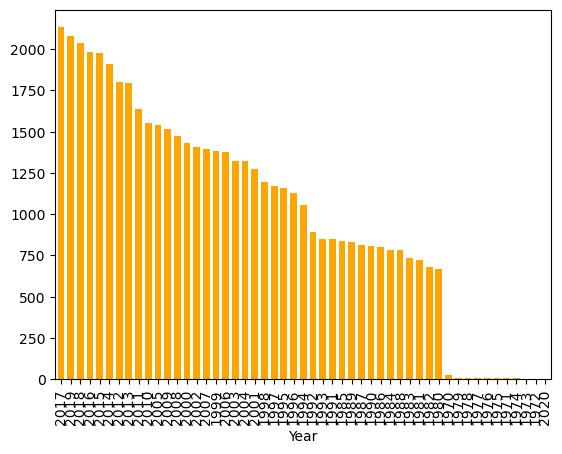

In [233]:
# bar plot for yearly drug seizures 
year_count = drug_seizures['Year'].value_counts()
year_bar = year_count.plot.bar(width = .7 ,color = 'orange', alpha = 1, linewidth = .8)

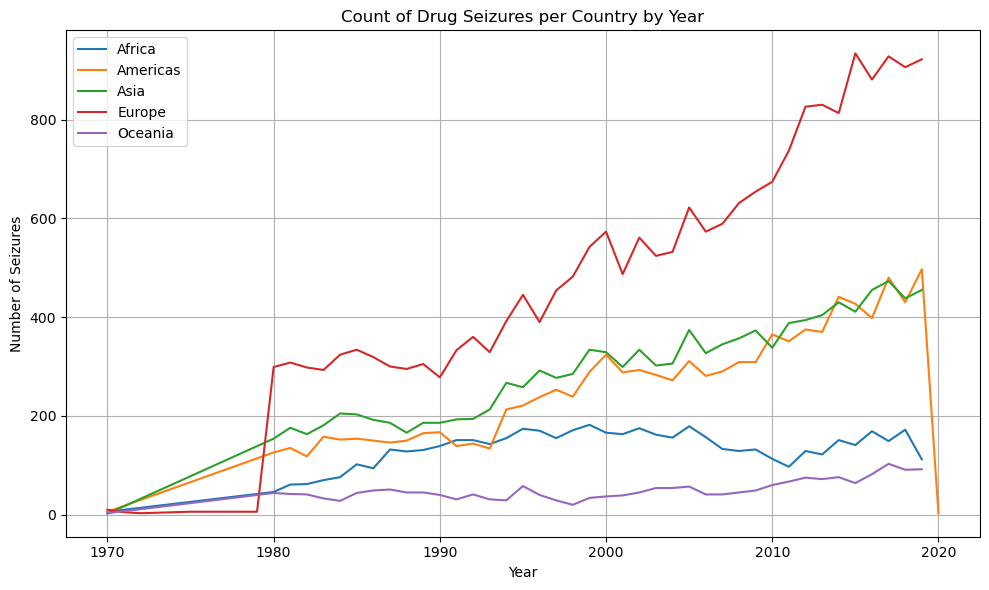

In [234]:
#creating a line graph to show the number of drug seizures per region by year 

seizures_count_per_year = drug_seizures.groupby(['Region', 'Year']).size().reset_index(name='Seizures Count')

plt.figure(figsize=(10, 6))

regions = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
for region in regions:
    region_data = seizures_count_per_year[seizures_count_per_year['Region'] == region]
    plt.plot(region_data['Year'], region_data['Seizures Count'], label=region)

plt.title('Count of Drug Seizures per Country by Year')
plt.xlabel('Year')
plt.ylabel('Number of Seizures')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

<Axes: ylabel='count'>

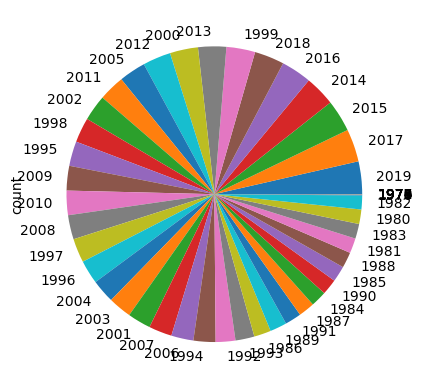

In [235]:
#creating pie charts to see what years had the most seizures 
drug_group = drug_seizures.loc[drug_seizures["Drug Group"]=="Opioids"]
year_pie = drug_group["Year"].value_counts()
year_pie.plot.pie()
#interpretation: the data per year seems to be generally evenly distributed


<Axes: xlabel='country'>

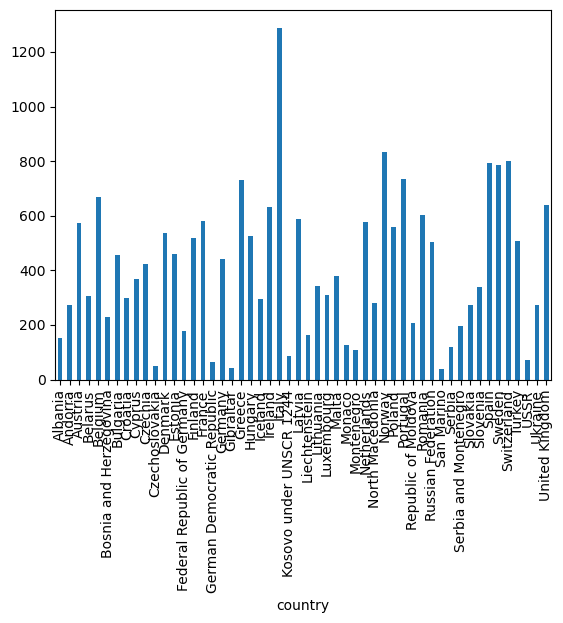

In [236]:
#dividing number of seizures by region and country in a bar graph 
#Europe
drug_group = drug_seizures.loc[drug_seizures["Region"]=="Europe"].groupby("country")
country_pie = drug_group["country"].value_counts()
country_pie.plot.bar()


<Axes: xlabel='country'>

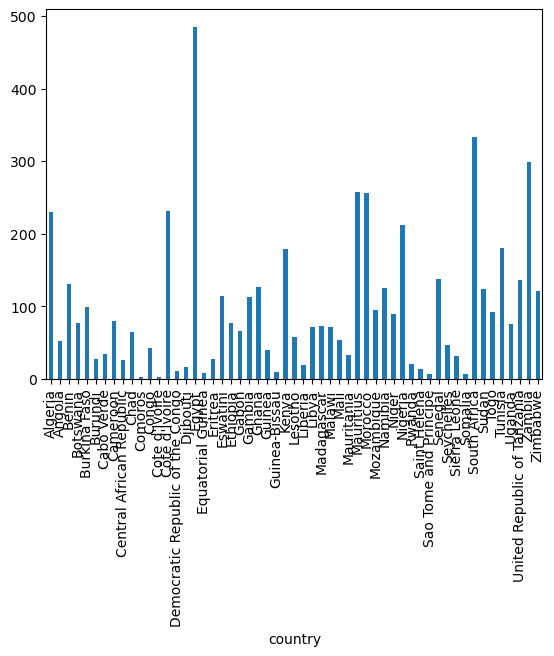

In [237]:
#dividing number of seizures by region and country in a bar graph 
#Africa
drug_group = drug_seizures.loc[drug_seizures["Region"]=="Africa"].groupby("country")
country_pie = drug_group["country"].value_counts()
country_pie.plot.bar()


<Axes: xlabel='country'>

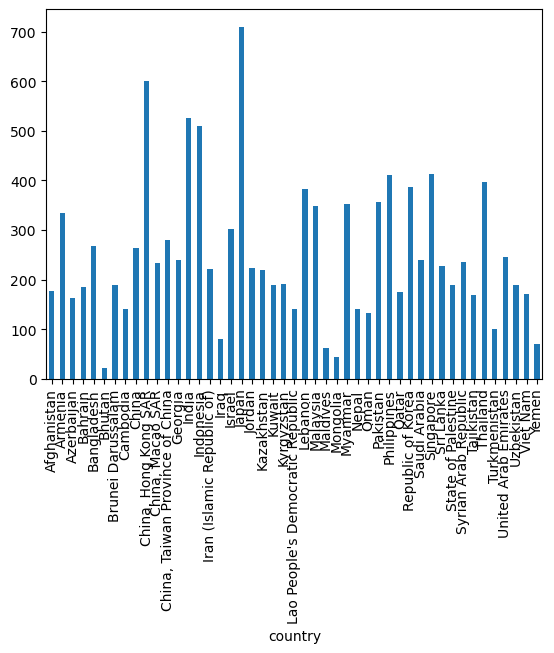

In [238]:
#dividing number of seizures by region and country in a bar graph 
#Asia
drug_group = drug_seizures.loc[drug_seizures["Region"]=="Asia"].groupby("country")
country_pie = drug_group["country"].value_counts()
country_pie.plot.bar()

<Axes: xlabel='country'>

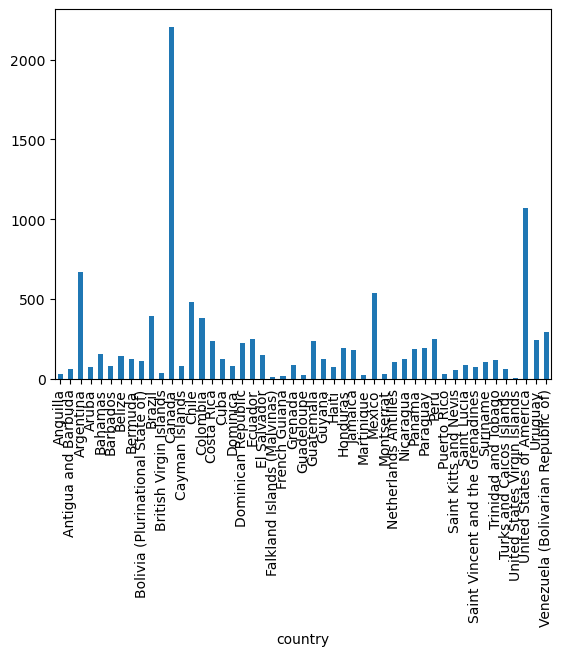

In [239]:
#dividing number of seizures by region and country in a bar graph 
#Americas
drug_group = drug_seizures.loc[drug_seizures["Region"]=="Americas"].groupby("country")
country_pie = drug_group["country"].value_counts()
country_pie.plot.bar()

<Axes: xlabel='country'>

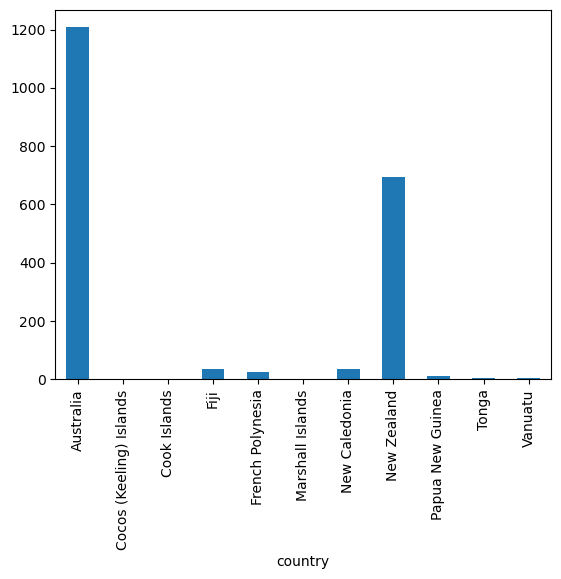

In [240]:
#dividing number of seizures by region and country in a bar graph 
#Oceania
drug_group = drug_seizures.loc[drug_seizures["Region"]=="Oceania"].groupby("country")
country_pie = drug_group["country"].value_counts()
country_pie.plot.bar()

In [241]:
#creating a dataframe by country and drug group 
sweden = drug_seizures.loc[drug_seizures["country"]=="Sweden"]
opioids_sweden = sweden.loc[drug_seizures["Drug Group"]== "Opioids"]

opioids_sweden

,Region,country,ISO Code,Drug Group,Drug,Year,KG Equivalent
24,Europe,Sweden,SWE,Opioids,Heroin,1970,0.135330
27,Europe,Sweden,SWE,Opioids,Heroin,1971,NaN
32,Europe,Sweden,SWE,Opioids,Heroin,1972,NaN
36,Europe,Sweden,SWE,Opioids,Heroin,1973,NaN
39,Europe,Sweden,SWE,Opioids,Heroin,1974,NaN
...,...,...,...,...,...,...,...
49831,Europe,Sweden,SWE,Opioids,Pharmaceutical opioids,2019,5.166000
49832,Europe,Sweden,SWE,Opioids,Pharmaceutical opioids,2019,84.336551
49833,Europe,Sweden,SWE,Opioids,Pharmaceutical opioids,2019,0.194250
49834,Europe,Sweden,SWE,Opioids,Pharmaceutical opioids,2019,6.500000


Text(0.5, 1.0, 'Americas 1980')

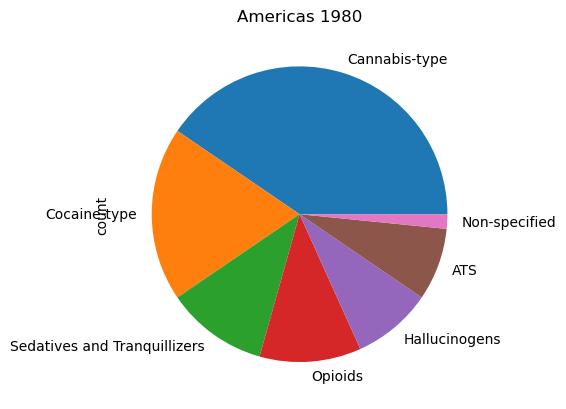

In [242]:
#diving the seizures by region and drug type and year
#Americas 1980
americas = drug_seizures.loc[drug_seizures["Region"]=="Americas"]
year_americas = americas.loc[drug_seizures["Year"]== 1980]
americas_pie = year_americas["Drug Group"].value_counts()
americas_pie.plot.pie()
plt.title("Americas 1980")

Text(0.5, 1.0, 'Americas 1990')

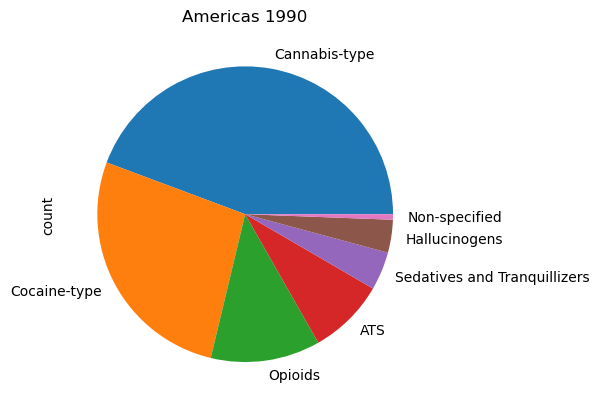

In [243]:
#Americas 1990
year_americas = americas.loc[drug_seizures["Year"]== 1990]
americas_pie = year_americas["Drug Group"].value_counts()
americas_pie.plot.pie()
plt.title("Americas 1990")

Text(0.5, 1.0, 'Americas 2000')

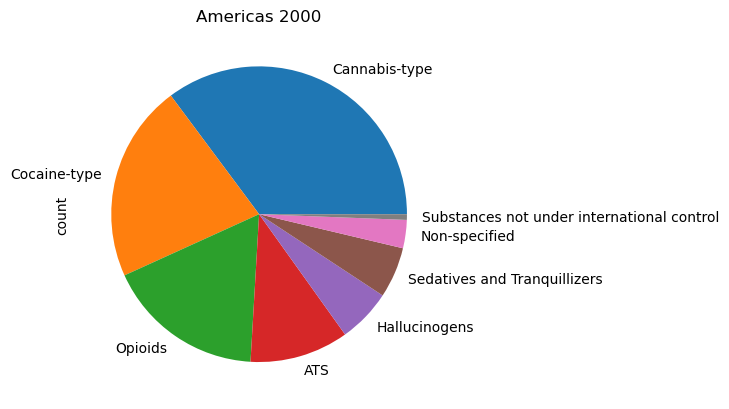

In [244]:
#Americas 2000
year_americas = americas.loc[drug_seizures["Year"]== 2000]
americas_pie = year_americas["Drug Group"].value_counts()
americas_pie.plot.pie()
plt.title("Americas 2000")

Text(0.5, 1.0, 'Americas 2010')

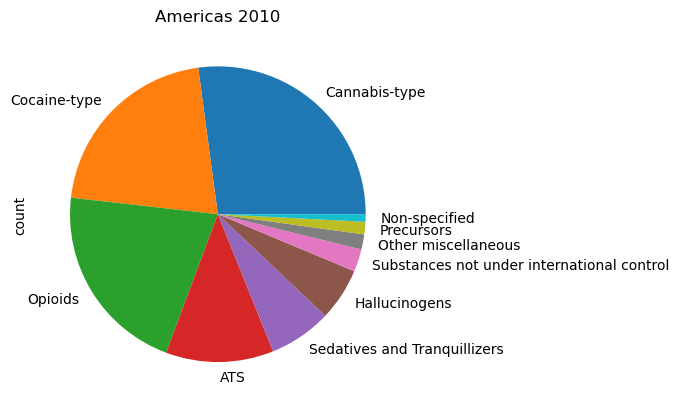

In [245]:
#Americas 2010
year_americas = americas.loc[drug_seizures["Year"]== 2010]
americas_pie = year_americas["Drug Group"].value_counts()
americas_pie.plot.pie()
plt.title("Americas 2010")

Text(0.5, 1.0, 'Americas 2019')

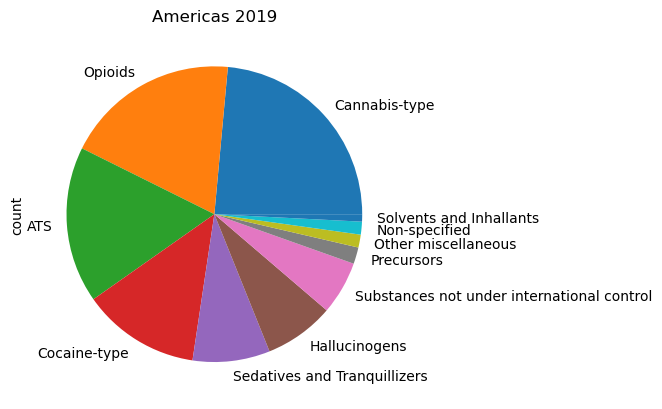

In [246]:
#Americas 2019
year_americas = americas.loc[drug_seizures["Year"]== 2019]
americas_pie = year_americas["Drug Group"].value_counts()
americas_pie.plot.pie()
plt.title("Americas 2019")

Text(0.5, 1.0, 'Europe 1980')

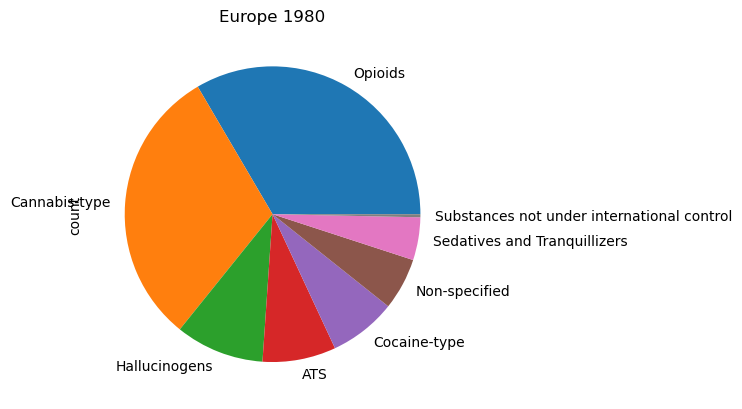

In [247]:
#europe 1980
europe = drug_seizures.loc[drug_seizures["Region"]=="Europe"]
year_europe = europe.loc[drug_seizures["Year"]== 1980]
europe_pie = year_europe["Drug Group"].value_counts()
europe_pie.plot.pie()
plt.title("Europe 1980")

Text(0.5, 1.0, 'Europe 1990')

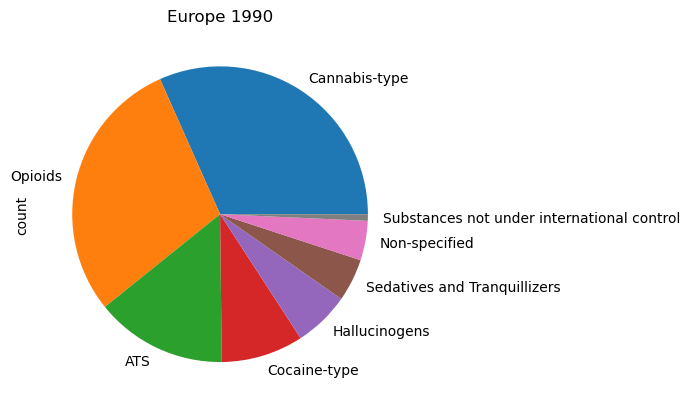

In [248]:
#europe 1990
year_europe = europe.loc[drug_seizures["Year"]== 1990]
europe_pie = year_europe["Drug Group"].value_counts()
europe_pie.plot.pie()
plt.title("Europe 1990")

Text(0.5, 1.0, 'Europe 2000')

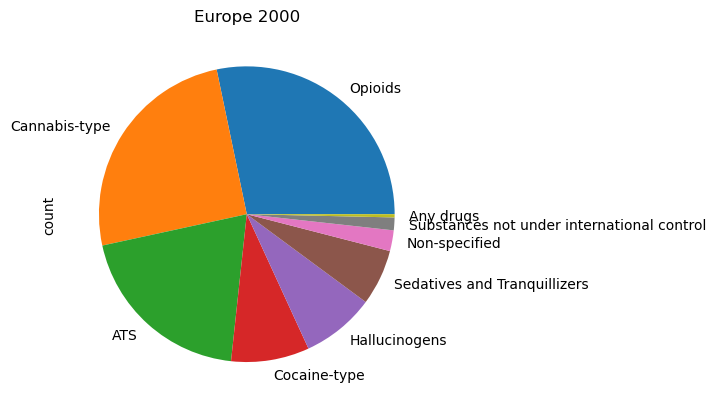

In [249]:
#europe 2000
year_europe = europe.loc[drug_seizures["Year"]== 2000]
europe_pie = year_europe["Drug Group"].value_counts()
europe_pie.plot.pie()
plt.title("Europe 2000")

Text(0.5, 1.0, 'Europe 2010')

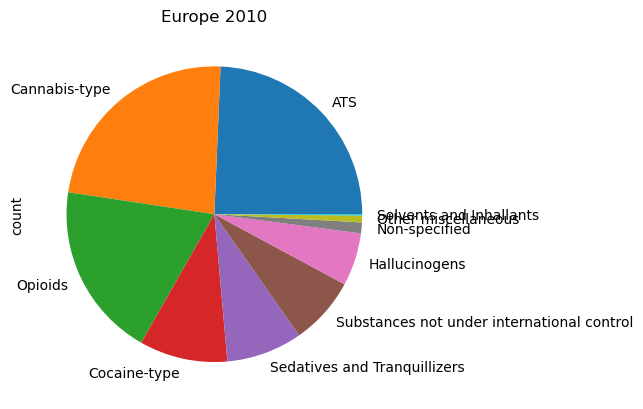

In [250]:
#europe 2010
year_europe = europe.loc[drug_seizures["Year"]== 2010]
europe_pie = year_europe["Drug Group"].value_counts()
europe_pie.plot.pie()
plt.title("Europe 2010")

Text(0.5, 1.0, 'Europe 2019')

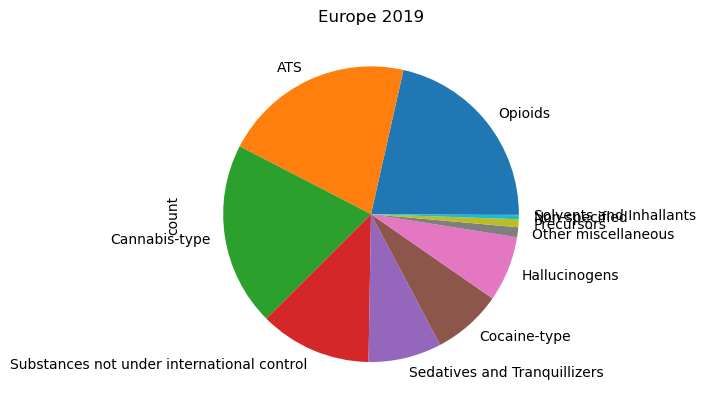

In [251]:
#europe 2019
year_europe = europe.loc[drug_seizures["Year"]== 2019]
europe_pie = year_europe["Drug Group"].value_counts()
europe_pie.plot.pie()
plt.title("Europe 2019")

In [252]:
#Create a Data Frame just for Opioid Seizures for future analysis 

opioid_df = pd.DataFrame(merged.loc[merged["Drug Group"]=="Opioids"])
opioid_df

,Region,country,ISO Code,Drug Group,Drug,Year,KG Equivalent,electricity_access,gdp,gdp_capita,...,air_pollution,population_density,population,alcohol_consumption,unemployment_rate,social_support,freedom,generosity,income_class,cpi
3,Africa,Algeria,DZA,Opioids,Heroin,1981.0,0.400000,99.49,1.680000e+11,4117.84,...,100.0,17.10,40736509.0,0.5844,10.540,0.785,0.51,-0.182,Lower middle income,34.50
18,Africa,Algeria,DZA,Opioids,Poppy plants,1987.0,37.300000,99.49,1.680000e+11,4117.84,...,100.0,17.10,40736509.0,0.5844,10.540,0.785,0.51,-0.182,Lower middle income,34.50
29,Africa,Algeria,DZA,Opioids,Heroin,1991.0,18.353001,99.49,1.680000e+11,4117.84,...,100.0,17.10,40736509.0,0.5844,10.540,0.785,0.51,-0.182,Lower middle income,34.50
33,Africa,Algeria,DZA,Opioids,Opium,1992.0,0.653000,99.49,1.680000e+11,4117.84,...,100.0,17.10,40736509.0,0.5844,10.540,0.785,0.51,-0.182,Lower middle income,34.50
37,Africa,Algeria,DZA,Opioids,Heroin,1993.0,0.028000,99.49,1.680000e+11,4117.84,...,100.0,17.10,40736509.0,0.5844,10.540,0.785,0.51,-0.182,Lower middle income,34.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51187,Asia,Bhutan,BTN,Opioids,Pharmaceutical opioids,2017.0,6.515800,98.09,2.264951e+09,3006.65,...,100.0,19.74,752813.0,0.3241,2.908,0.848,0.83,0.287,Lower middle income,66.25
51191,Asia,Bhutan,BTN,Opioids,Pharmaceutical opioids,2018.0,14.700000,98.09,2.264951e+09,3006.65,...,100.0,19.74,752813.0,0.3241,2.908,0.848,0.83,0.287,Lower middle income,66.25
51192,Asia,Bhutan,BTN,Opioids,Pharmaceutical opioids,2018.0,4.475250,98.09,2.264951e+09,3006.65,...,100.0,19.74,752813.0,0.3241,2.908,0.848,0.83,0.287,Lower middle income,66.25
51196,Asia,Bhutan,BTN,Opioids,Pharmaceutical opioids,2019.0,33.300000,98.09,2.264951e+09,3006.65,...,100.0,19.74,752813.0,0.3241,2.908,0.848,0.83,0.287,Lower middle income,66.25


In [253]:
# Calculate the opioids seizure rate by region
region_list = ["Americas", "Africa", "Europe", "Asia", "Oceania"]
region = opioid_df[opioid_df["Region"].isin(region_list)]
region

,Region,country,ISO Code,Drug Group,Drug,Year,KG Equivalent,electricity_access,gdp,gdp_capita,...,air_pollution,population_density,population,alcohol_consumption,unemployment_rate,social_support,freedom,generosity,income_class,cpi
3,Africa,Algeria,DZA,Opioids,Heroin,1981.0,0.400000,99.49,1.680000e+11,4117.84,...,100.0,17.10,40736509.0,0.5844,10.540,0.785,0.51,-0.182,Lower middle income,34.50
18,Africa,Algeria,DZA,Opioids,Poppy plants,1987.0,37.300000,99.49,1.680000e+11,4117.84,...,100.0,17.10,40736509.0,0.5844,10.540,0.785,0.51,-0.182,Lower middle income,34.50
29,Africa,Algeria,DZA,Opioids,Heroin,1991.0,18.353001,99.49,1.680000e+11,4117.84,...,100.0,17.10,40736509.0,0.5844,10.540,0.785,0.51,-0.182,Lower middle income,34.50
33,Africa,Algeria,DZA,Opioids,Opium,1992.0,0.653000,99.49,1.680000e+11,4117.84,...,100.0,17.10,40736509.0,0.5844,10.540,0.785,0.51,-0.182,Lower middle income,34.50
37,Africa,Algeria,DZA,Opioids,Heroin,1993.0,0.028000,99.49,1.680000e+11,4117.84,...,100.0,17.10,40736509.0,0.5844,10.540,0.785,0.51,-0.182,Lower middle income,34.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51187,Asia,Bhutan,BTN,Opioids,Pharmaceutical opioids,2017.0,6.515800,98.09,2.264951e+09,3006.65,...,100.0,19.74,752813.0,0.3241,2.908,0.848,0.83,0.287,Lower middle income,66.25
51191,Asia,Bhutan,BTN,Opioids,Pharmaceutical opioids,2018.0,14.700000,98.09,2.264951e+09,3006.65,...,100.0,19.74,752813.0,0.3241,2.908,0.848,0.83,0.287,Lower middle income,66.25
51192,Asia,Bhutan,BTN,Opioids,Pharmaceutical opioids,2018.0,4.475250,98.09,2.264951e+09,3006.65,...,100.0,19.74,752813.0,0.3241,2.908,0.848,0.83,0.287,Lower middle income,66.25
51196,Asia,Bhutan,BTN,Opioids,Pharmaceutical opioids,2019.0,33.300000,98.09,2.264951e+09,3006.65,...,100.0,19.74,752813.0,0.3241,2.908,0.848,0.83,0.287,Lower middle income,66.25


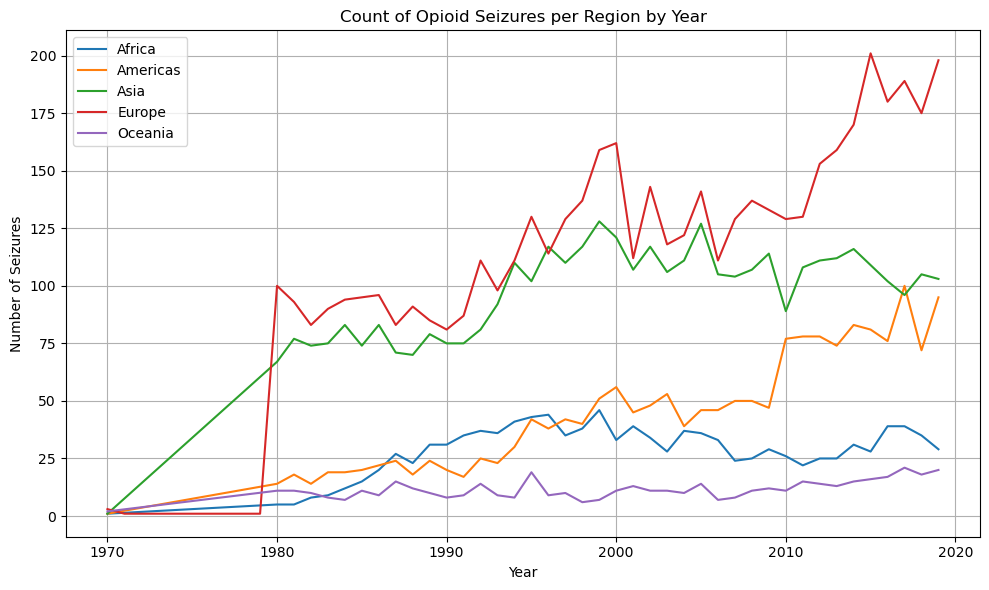

In [254]:
seizures_count_per_year = opioid_df.groupby(['Region', 'Year']).size().reset_index(name='Seizures Count')

# Plotting the line graph
plt.figure(figsize=(10, 6))

regions = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
for region in regions:
    region_data = seizures_count_per_year[seizures_count_per_year['Region'] == region]
    plt.plot(region_data['Year'], region_data['Seizures Count'], label=region)

plt.title('Count of Opioid Seizures per Region by Year')
plt.xlabel('Year')
plt.ylabel('Number of Seizures')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [255]:

# IQR analysis of KG seizures by region  
region_list = ["Americas", "Africa", "Europe", "Asia", "Oceania"]
region = opioid_df[opioid_df["Region"].isin(region_list)]
last = region.groupby(['Region', 'country']).agg(seizure = ('KG Equivalent', lambda x: x.iloc[-1] ))
last = last.stack(level=0).unstack(level=0)
count = 0
for region in region_list:
    quartiles = last[region].quantile([.25,.5,.75]).round(2)
    lower_quartile = quartiles[0.25].round(2)
    upper_quartile = quartiles[0.75].round(2)
    interquartile_range = round(upper_quartile-lower_quartile,2)
    lower_outlier = round(lower_quartile - (1.5*interquartile_range),2)
    upper_outlier= round(upper_quartile + (1.5*interquartile_range),2)


    if count == 0:
        print(f"------------------------------------------------------------")
        print(f"{region} seizures IQR by kilogram :")
    print(f"The lower quartile: {lower_quartile}")
    print(f"The upper quartile: {upper_quartile}")
    print(f"The interquartile range: {interquartile_range}")
    print(f"Values below {lower_outlier} could be possible outliers.")
    print(f"Values above {upper_outlier} could be possible outliers.")
    print(f"------------------------------------------------------------")
   

------------------------------------------------------------
Americas seizures IQR by kilogram :
The lower quartile: 0.03
The upper quartile: 5.0
The interquartile range: 4.97
Values below -7.42 could be possible outliers.
Values above 12.46 could be possible outliers.
------------------------------------------------------------
------------------------------------------------------------
Africa seizures IQR by kilogram :
The lower quartile: 0.3
The upper quartile: 21.5
The interquartile range: 21.2
Values below -31.5 could be possible outliers.
Values above 53.3 could be possible outliers.
------------------------------------------------------------
------------------------------------------------------------
Europe seizures IQR by kilogram :
The lower quartile: 0.02
The upper quartile: 8.8
The interquartile range: 8.78
Values below -13.15 could be possible outliers.
Values above 21.97 could be possible outliers.
------------------------------------------------------------
-----------

In [256]:
#HYPOTHESIS: Countries with a higher cpi will have less seizures 
#creating a loop to see text of both cpi and number of seizures per country 
country_list=  ['Algeria', 'Argentina', 'Australia', 'Austria', 'Bahrain',
       'Belgium', 'Botswana', 'Bulgaria', 'Canada', 'Chile', 'Cameroon',
       'Czechoslovakia', 'Denmark', 'Egypt', 'Sweden', 'Afghanistan',
       'Barbados', 'Benin', 'Bermuda', 'Bangladesh', 'Bahamas',
       'Bolivia (Plurinational State of)', 'Brazil',
       'British Virgin Islands', 'Belize', 'Cayman Islands', 'Colombia',
       'Costa Rica', 'Cyprus', 'Djibouti', 'Ecuador', 'Finland',
       'French Polynesia', 'France', 'German Democratic Republic',
       'Federal Republic of Germany', 'Greece', 'Guyana',
       'China, Hong Kong SAR', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran (Islamic Republic of)', 'Ireland', 'Iraq',
       'Israel', 'Italy', "Côte d'Ivoire", 'Jamaica', 'Japan', 'Jordan',
       'Kenya', 'Kuwait', 'Lebanon', 'Lesotho', 'Luxembourg',
       'Madagascar', 'Malaysia', 'Mauritius', 'Malta', 'Mauritania',
       'Maldives', 'Mexico', 'Monaco', 'Morocco', 'Myanmar',
       'Netherlands Antilles', 'New Caledonia', 'Nepal', 'Netherlands',
       'Nigeria', 'Norway', 'New Zealand', 'Oman', 'Pakistan', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar',
       'Republic of Korea', 'Romania', 'South Africa', 'Seychelles',
       'Singapore', 'Somalia', 'Spain', 'Sri Lanka',
       'Saint Vincent and the Grenadines', 'Eswatini', 'Switzerland',
       'Syrian Arab Republic', 'Turks and Caicos Islands', 'Thailand',
       'Togo', 'Trinidad and Tobago', 'Tunisia', 'Turkey',
       'United Arab Emirates', 'United Kingdom',
       'United States of America', 'USSR',
       'Venezuela (Bolivarian Republic of)', 'Serbia and Montenegro',
       'Zambia', 'Burkina Faso', 'Central African Republic', 'Fiji',
       'Guatemala', 'Libya', 'Liechtenstein', 'China, Macao SAR',
       'Mozambique', 'Nicaragua', 'Senegal', 'Sudan', 'Cuba', 'Ghana',
       "Cote d'Ivoire", 'San Marino', 'Zimbabwe',
       'Cocos (Keeling) Islands', 'Gambia', 'Haiti', 'Malawi',
       'Montserrat', 'Tonga', 'Burundi', 'China', 'Dominica', 'Gabon',
       'Saudi Arabia', 'Saint Lucia', 'Falkland Islands (Malvinas)',
       'Guinea-Bissau', 'Mali', 'Papua New Guinea',
       'United Republic of Tanzania', 'Yemen', 'Brunei Darussalam',
       'Ethiopia', 'Suriname', 'Uganda', 'Uruguay', 'Vanuatu', 'Andorra',
       'Antigua and Barbuda', 'Chad', 'Guinea', 'El Salvador', 'Germany',
       'Niger', 'Rwanda', 'Viet Nam', 'Democratic Republic of the Congo',
       'Angola', 'Aruba', 'Grenada', 'Namibia', 'Anguilla',
       'Dominican Republic', "Lao People's Democratic Republic",
       'North Macedonia', 'Russian Federation', 'Belarus', 'Comoros',
       'Congo', 'Sierra Leone', 'Saint Kitts and Nevis', 'Tajikistan',
       'Ukraine', 'Azerbaijan', 'Cambodia', 'Croatia',
       'Equatorial Guinea', 'Estonia', 'Kazakhstan', 'Latvia',
       'Lithuania', 'Slovenia', 'Slovakia', 'Armenia', 'Czechia',
       'Turkmenistan', 'Uzbekistan', 'French Guiana', 'Guadeloupe',
       'Republic of Moldova', 'State of Palestine', 'Puerto Rico',
       'Kyrgyzstan', 'Bosnia and Herzegovina', 'Cook Islands', 'Georgia',
       'Martinique', 'Saint Helena', 'Sao Tome and Principe',
       'China, Taiwan Province of China', 'Albania', 'Cabo Verde',
       'Mongolia', 'United States Virgin Islands', 'Eritrea',
       'Kosovo under UNSCR 1244', 'Marshall Islands', 'Gibraltar',
       'Liberia', 'Montenegro', 'Serbia', 'Bhutan', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Guam', 'Iran', "Korea, Dem. People's Rep.",
       'Kosovo', 'Lao PDR', 'Moldova', 'Russia', 'Samoa',
       'São Tomé and Príncipe', 'Slovak Republic', 'Solomon Islands',
       'South Sudan', 'St. Lucia', 'St. Vincent and the Grenadines',
       'Syria', 'Tanzania', 'Timor-Leste', 'Vietnam']


In [257]:
for country in country_list:
    place  = merged.loc[merged["country"]== country]
    cpi = place['cpi'].iloc[0]
    num_seizures = place['KG Equivalent'].count()
    
  
    print("----------------------------------------------------------")
    print(f"{country}")
    print(f"The corruption perceptions index in {country} is {cpi}")
    print(f'The total number of seizures in {country} are {num_seizures}')
    
        
  
   

----------------------------------------------------------
Algeria
The corruption perceptions index in Algeria is 34.5
The total number of seizures in Algeria are 223
----------------------------------------------------------
Argentina
The corruption perceptions index in Argentina is 36.75
The total number of seizures in Argentina are 651
----------------------------------------------------------
Australia
The corruption perceptions index in Australia is 78.0
The total number of seizures in Australia are 1201
----------------------------------------------------------
Austria
The corruption perceptions index in Austria is 75.5
The total number of seizures in Austria are 571
----------------------------------------------------------
Bahrain
The corruption perceptions index in Bahrain is 41.5
The total number of seizures in Bahrain are 182
----------------------------------------------------------
Belgium
The corruption perceptions index in Belgium is 76.0
The total number of seizures in 

----------------------------------------------------------
New Zealand
The corruption perceptions index in New Zealand is 89.25
The total number of seizures in New Zealand are 690
----------------------------------------------------------
Oman
The corruption perceptions index in Oman is 46.5
The total number of seizures in Oman are 129
----------------------------------------------------------
Pakistan
The corruption perceptions index in Pakistan is 31.75
The total number of seizures in Pakistan are 356
----------------------------------------------------------
Panama
The corruption perceptions index in Panama is 37.75
The total number of seizures in Panama are 186
----------------------------------------------------------
Paraguay
The corruption perceptions index in Paraguay is 28.75
The total number of seizures in Paraguay are 191
----------------------------------------------------------
Peru
The corruption perceptions index in Peru is 35.75
The total number of seizures in Peru are 

----------------------------------------------------------
Saint Kitts and Nevis
The corruption perceptions index in Saint Kitts and Nevis is nan
The total number of seizures in Saint Kitts and Nevis are 54
----------------------------------------------------------
Tajikistan
The corruption perceptions index in Tajikistan is 24.25
The total number of seizures in Tajikistan are 169
----------------------------------------------------------
Ukraine
The corruption perceptions index in Ukraine is 29.5
The total number of seizures in Ukraine are 271
----------------------------------------------------------
Azerbaijan
The corruption perceptions index in Azerbaijan is 28.75
The total number of seizures in Azerbaijan are 160
----------------------------------------------------------
Cambodia
The corruption perceptions index in Cambodia is 20.75
The total number of seizures in Cambodia are 139
----------------------------------------------------------
Croatia
The corruption perceptions index i

In [275]:
#creating a list for future use of number of seizures and country 
country_list=  ['Algeria', 'Argentina', 'Australia', 'Austria', 'Bahrain',
       'Belgium', 'Botswana', 'Bulgaria', 'Canada', 'Chile', 'Cameroon',
       'Czechoslovakia', 'Denmark', 'Egypt', 'Sweden', 'Afghanistan',
       'Barbados', 'Benin', 'Bermuda', 'Bangladesh', 'Bahamas', 'Brazil',
       'British Virgin Islands', 'Belize', 'Cayman Islands', 'Colombia',
       'Costa Rica', 'Cyprus', 'Djibouti', 'Ecuador', 'Finland',
       'French Polynesia', 'France', 'Greece', 'Guyana', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran (Islamic Republic of)', 'Ireland', 'Iraq',
       'Israel', 'Italy', "Côte d'Ivoire", 'Jamaica', 'Japan', 'Jordan',
       'Kenya', 'Kuwait', 'Lebanon', 'Lesotho', 'Luxembourg',
       'Madagascar', 'Malaysia', 'Mauritius', 'Malta', 'Mauritania',
       'Maldives', 'Mexico', 'Monaco', 'Morocco', 'Myanmar','New Caledonia', 'Nepal', 'Netherlands',
       'Nigeria', 'Norway', 'New Zealand', 'Oman', 'Pakistan', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar',
       'Republic of Korea', 'Romania', 'South Africa', 'Seychelles',
       'Singapore', 'Somalia', 'Spain', 'Sri Lanka',
       'Saint Vincent and the Grenadines', 'Eswatini', 'Switzerland',
       'Syrian Arab Republic', 'Turks and Caicos Islands', 'Thailand',
       'Togo', 'Trinidad and Tobago', 'Tunisia', 'Turkey',
       'United Arab Emirates', 'United Kingdom',
       'United States of America', 
       'Zambia', 'Burkina Faso', 'Central African Republic', 'Fiji',
       'Guatemala', 'Libya', 'Liechtenstein', 
       'Mozambique', 'Nicaragua', 'Senegal', 'Sudan', 'Cuba', 'Ghana',
       "Cote d'Ivoire", 'San Marino', 'Zimbabwe', 'Gambia', 'Haiti', 'Malawi',
       'Montserrat', 'Tonga', 'Burundi', 'China', 'Dominica', 'Gabon',
       'Saudi Arabia', 'Saint Lucia',
       'Guinea-Bissau', 'Mali', 'Papua New Guinea',
       'United Republic of Tanzania', 'Yemen', 'Brunei Darussalam',
       'Ethiopia', 'Suriname', 'Uganda', 'Uruguay', 'Vanuatu', 'Andorra',
       'Antigua and Barbuda', 'Chad', 'Guinea', 'El Salvador', 'Germany',
       'Niger', 'Rwanda', 'Viet Nam', 'Democratic Republic of the Congo',
       'Angola', 'Aruba', 'Grenada', 'Namibia', 'Anguilla',
       'Dominican Republic', "Lao People's Democratic Republic",
       'North Macedonia', 'Belarus', 'Comoros',
       'Congo', 'Sierra Leone', 'Saint Kitts and Nevis', 'Tajikistan',
       'Ukraine', 'Azerbaijan', 'Cambodia', 'Croatia',
       'Equatorial Guinea', 'Estonia', 'Kazakhstan', 'Latvia',
       'Lithuania', 'Slovenia', 'Slovakia', 'Armenia', 'Czechia',
       'Turkmenistan', 'Uzbekistan', 'French Guiana', 'Guadeloupe',
       'Republic of Moldova', 'State of Palestine', 'Puerto Rico',
       'Kyrgyzstan', 'Bosnia and Herzegovina', 'Cook Islands', 'Georgia',
       'Martinique', 'Saint Helena', 'Sao Tome and Principe', 'Albania', 'Cabo Verde',
       'Mongolia', 'United States Virgin Islands', 'Eritrea',
        'Marshall Islands', 'Gibraltar',
       'Liberia', 'Montenegro', 'Serbia', 'Bhutan',
        'Guam', 'Iran', "Korea, Dem. People's Rep.",
       'Kosovo', 'Moldova', 'Russia', 'Samoa',
       'São Tomé and Príncipe', 'Solomon Islands',
       'South Sudan', 'St. Lucia', 'St. Vincent and the Grenadines',
       'Syria', 'Tanzania', 'Timor-Leste', 'Vietnam']




for country in country_list:
    #yearly_mean = drug_seizures['KG Equivalent'].groupby(drug_seizures['Year']).mean()
    #sweden = drug_seizures.loc[drug_seizures["country"]=="Sweden"]
    place  = merged.loc[merged["country"]== country]
    cpi = place['cpi'].iloc[0]
    num_seizures = place['KG Equivalent'].count()
    
  
 
    print(f'"{country}":{num_seizures},')
    

"Algeria":223,
"Argentina":651,
"Australia":1201,
"Austria":571,
"Bahrain":182,
"Belgium":662,
"Botswana":77,
"Bulgaria":455,
"Canada":2201,
"Chile":479,
"Cameroon":76,
"Czechoslovakia":48,
"Denmark":536,
"Egypt":480,
"Sweden":768,
"Afghanistan":176,
"Barbados":78,
"Benin":130,
"Bermuda":123,
"Bangladesh":266,
"Bahamas":156,
"Brazil":390,
"British Virgin Islands":38,
"Belize":142,
"Cayman Islands":81,
"Colombia":368,
"Costa Rica":230,
"Cyprus":369,
"Djibouti":17,
"Ecuador":242,
"Finland":507,
"French Polynesia":23,
"France":577,
"Greece":726,
"Guyana":120,
"Honduras":192,
"Hungary":526,
"Iceland":292,
"India":523,
"Indonesia":486,
"Iran (Islamic Republic of)":222,
"Ireland":617,
"Iraq":80,
"Israel":300,
"Italy":1287,
"Côte d'Ivoire":228,
"Jamaica":180,
"Japan":704,
"Jordan":220,
"Kenya":178,
"Kuwait":188,
"Lebanon":382,
"Lesotho":56,
"Luxembourg":308,
"Madagascar":73,
"Malaysia":343,
"Mauritius":252,
"Malta":369,
"Mauritania":33,
"Maldives":59,
"Mexico":532,
"Monaco":118,
"Morocco":254

In [260]:
#creating a list for future use of cpi and country 
for country in country_list:
    place  = merged.loc[merged["country"]== country]
    cpi = place['cpi'].iloc[0]
    num_seizures = place['KG Equivalent'].count()
    

    
    print(f'"{country}":{cpi},')



,Region,country,ISO Code,Drug Group,Drug,Year,KG Equivalent,electricity_access,gdp,gdp_capita,...,air_pollution,population_density,population,alcohol_consumption,unemployment_rate,social_support,freedom,generosity,income_class,cpi
0,Africa,Algeria,DZA,Cannabis-type,Marijuana (herb),1970.0,141.00,99.49,1.680000e+11,4117.84,...,100.0,17.10,40736509.0,0.5844,10.540,0.785,0.510,-0.182,Lower middle income,34.50
1,Africa,Algeria,DZA,Cannabis-type,Hashish (resin),1970.0,140.00,99.49,1.680000e+11,4117.84,...,100.0,17.10,40736509.0,0.5844,10.540,0.785,0.510,-0.182,Lower middle income,34.50
2,Africa,Algeria,DZA,Cannabis-type,Marijuana (herb),1980.0,240.00,99.49,1.680000e+11,4117.84,...,100.0,17.10,40736509.0,0.5844,10.540,0.785,0.510,-0.182,Lower middle income,34.50
3,Africa,Algeria,DZA,Opioids,Heroin,1981.0,0.40,99.49,1.680000e+11,4117.84,...,100.0,17.10,40736509.0,0.5844,10.540,0.785,0.510,-0.182,Lower middle income,34.50
4,Africa,Algeria,DZA,Cannabis-type,Marijuana (herb),1981.0,14.00,99.49,1.680000e+11,4117.84,...,100.0,17.10,40736509.0,0.5844,10.540,0.785,0.510,-0.182,Lower middle income,34.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50947,Africa,Liberia,LBR,Opioids,Heroin,2016.0,14.32,19.97,3.359738e+09,707.18,...,100.0,49.33,4751112.0,3.6264,2.931,0.673,0.734,0.049,Low income,34.25
50948,Africa,Liberia,LBR,Cannabis-type,Marijuana (herb),2019.0,7430.00,19.97,3.359738e+09,707.18,...,100.0,49.33,4751112.0,3.6264,2.931,0.673,0.734,0.049,Low income,34.25
50949,Africa,Liberia,LBR,Opioids,Heroin,2019.0,46.00,19.97,3.359738e+09,707.18,...,100.0,49.33,4751112.0,3.6264,2.931,0.673,0.734,0.049,Low income,34.25
50950,Africa,Liberia,LBR,Cocaine-type,Cocaine salts,2019.0,3.40,19.97,3.359738e+09,707.18,...,100.0,49.33,4751112.0,3.6264,2.931,0.673,0.734,0.049,Low income,34.25


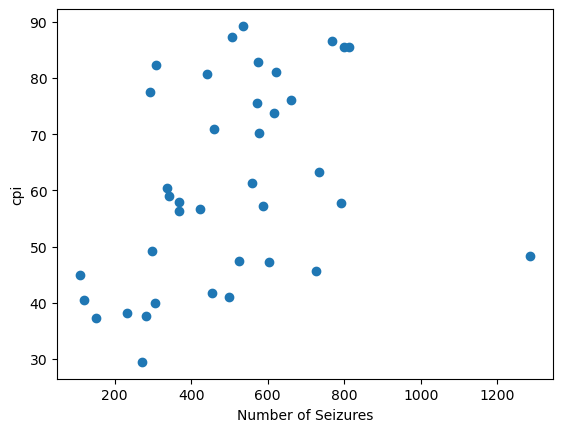

In [261]:
#making scatter plots to show results of cpi vs number of seizures hypothesis analysis by region 
#europe 
europe = merged.loc[merged["Region"]=="Europe"].groupby("country")
s_count = europe["KG Equivalent"].count()
c = europe["cpi"].unique()
plt.scatter(s_count, c)
plt.xlabel("Number of Seizures")
plt.ylabel("cpi")
plt.show()


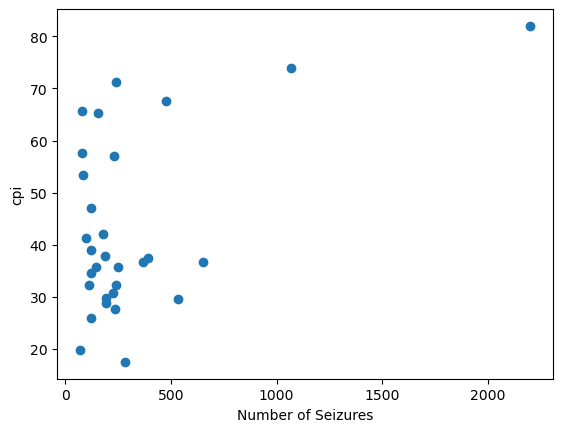

In [277]:
#americas
americas = merged.loc[merged["Region"]=="Americas"].groupby("country")
s_count = americas["KG Equivalent"].count()
c = americas["cpi"].unique()
plt.scatter(s_count, c)
plt.xlabel("Number of Seizures")
plt.ylabel("cpi")
plt.show()

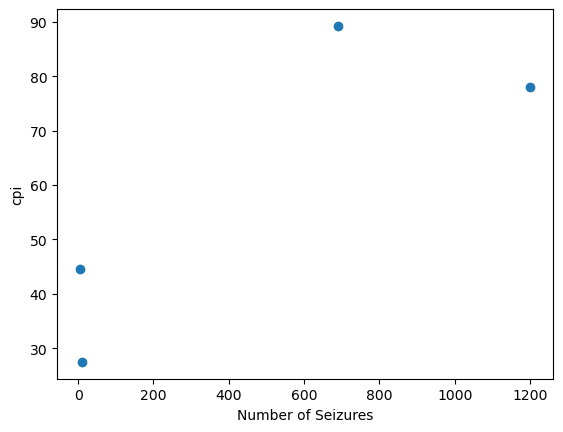

In [280]:
#oceania
oceania = merged.loc[merged["Region"]=="Oceania"].groupby("country")
s_count = oceania["KG Equivalent"].count()
c = oceania["cpi"].unique()
plt.scatter(s_count, c)
plt.xlabel("Number of Seizures")
plt.ylabel("cpi")
plt.show()

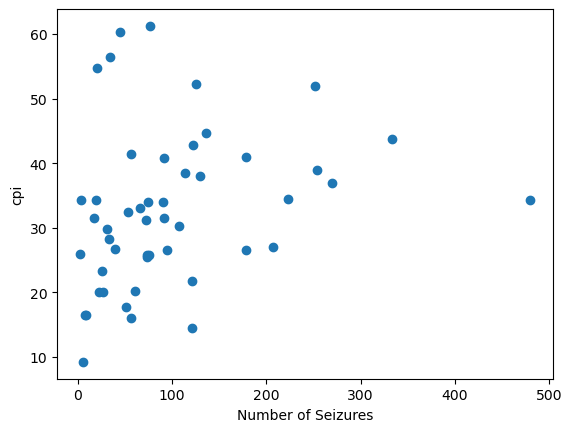

In [282]:
#africa
africa = merged.loc[merged["Region"]=="Africa"].groupby("country")
s_count = africa["KG Equivalent"].count()
c = africa["cpi"].unique()
plt.scatter(s_count, c)
plt.xlabel("Number of Seizures")
plt.ylabel("cpi")
plt.show()

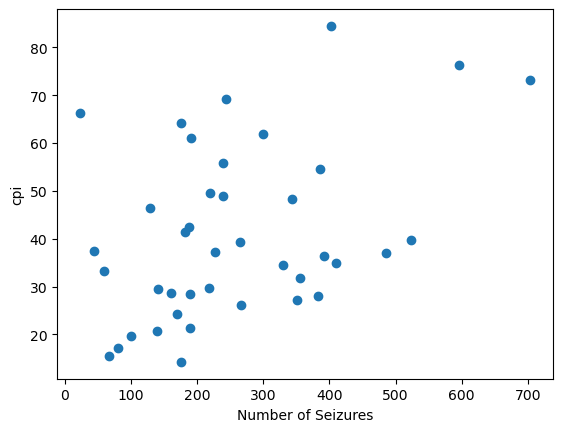

In [290]:
#asia
asia = merged.loc[merged["Region"]=="Asia"].groupby("country")
s_count = asia["KG Equivalent"].count()
c = asia["cpi"].unique()
plt.scatter(s_count, c)
plt.xlabel("Number of Seizures")
plt.ylabel("cpi")
plt.show()



In [262]:
import geopandas as gpd
import requests

In [263]:
def get_coordinates(country):
    api_key = "1f399452ec30453c8589c5bd709d7cf7"
    url = f"https://api.geoapify.com/v1/geocode/search?text={country}&apiKey={api_key}"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        if data['features']:
            coordinates = data['features'][0]['geometry']['coordinates']
            return coordinates
            return 
    
    return None

In [264]:
x = get_coordinates("Sweden")
print(x)

[14.5208584, 59.6749712]


In [265]:

drug_seizures = {
"Algeria":223,
"Argentina":651,
"Australia":1201,
"Austria":571,
"Bahrain":182,
"Belgium":662,
"Botswana":77,
"Bulgaria":455,
"Canada":2201,
"Chile":479,
"Cameroon":76,
"Czechoslovakia":48,
"Denmark":536,
"Egypt":480,
"Sweden":768,
"Afghanistan":176,
"Barbados":78,
"Benin":130,
"Bermuda":123,
"Bangladesh":266,
"Bahamas":156,
"Brazil":390,
"British Virgin Islands":38,
"Belize":142,
"Cayman Islands":81,
"Colombia":368,
"Costa Rica":230,
"Cyprus":369,
"Djibouti":17,
"Ecuador":242,
"Finland":507,
"French Polynesia":23,
"France":577,
"Greece":726,
"Guyana":120,
"Honduras":192,
"Hungary":526,
"Iceland":292,
"India":523,
"Indonesia":486,
"Iran (Islamic Republic of)":222,
"Ireland":617,
"Iraq":80,
"Israel":300,
"Italy":1287,
"Côte d'Ivoire":228,
"Jamaica":180,
"Japan":704,
"Jordan":220,
"Kenya":178,
"Kuwait":188,
"Lebanon":382,
"Lesotho":56,
"Luxembourg":308,
"Madagascar":73,
"Malaysia":343,
"Mauritius":252,
"Malta":369,
"Mauritania":33,
"Maldives":59,
"Mexico":532,
"Monaco":118,
"Morocco":254,
"Myanmar":351,
"New Caledonia":34,
"Nepal":141,
"Netherlands":575,
"Nigeria":207,
"Norway":813,
"New Zealand":690,
"Oman":129,
"Pakistan":356,
"Panama":186,
"Paraguay":191,
"Peru":248,
"Philippines":410,
"Poland":558,
"Portugal":733,
"Qatar":175,
"Republic of Korea":386,
"Romania":603,
"South Africa":333,
"Seychelles":45,
"Singapore":402,
"Somalia":6,
"Spain":792,
"Sri Lanka":227,
"Saint Vincent and the Grenadines":76,
"Eswatini":114,
"Switzerland":799,
"Syrian Arab Republic":236,
"Turks and Caicos Islands":60,
"Thailand":391,
"Togo":91,
"Trinidad and Tobago":120,
"Tunisia":178,
"Turkey":499,
"United Arab Emirates":243,
"United Kingdom":621,
"United States of America":1069,
"Zambia":270,
"Burkina Faso":92,
"Central African Republic":26,
"Fiji":36,
"Guatemala":236,
"Libya":56,
"Liechtenstein":144,
"Mozambique":95,
"Nicaragua":122,
"Senegal":136,
"Sudan":121,
"Cuba":121,
"Ghana":122,
"Cote d'Ivoire":3,
"San Marino":38,
"Zimbabwe":121,
"Gambia":107,
"Haiti":68,
"Malawi":72,
"Montserrat":27,
"Tonga":4,
"Burundi":23,
"China":264,
"Dominica":81,
"Gabon":66,
"Saudi Arabia":239,
"Saint Lucia":79,
"Guinea-Bissau":9,
"Mali":53,
"Papua New Guinea":11,
"United Republic of Tanzania":135,
"Yemen":67,
"Brunei Darussalam":190,
"Ethiopia":75,
"Suriname":99,
"Uganda":74,
"Uruguay":240,
"Vanuatu":4,
"Andorra":274,
"Antigua and Barbuda":59,
"Chad":61,
"Guinea":40,
"El Salvador":146,
"Germany":440,
"Niger":90,
"Rwanda":21,
"Viet Nam":171,
"Democratic Republic of the Congo":11,
"Angola":51,
"Aruba":71,
"Grenada":86,
"Namibia":125,
"Anguilla":29,
"Dominican Republic":225,
"Lao People's Democratic Republic":141,
"North Macedonia":281,
"Belarus":306,
"Comoros":2,
"Congo":40,
"Sierra Leone":31,
"Saint Kitts and Nevis":54,
"Tajikistan":169,
"Ukraine":271,
"Azerbaijan":160,
"Cambodia":139,
"Croatia":298,
"Equatorial Guinea":8,
"Estonia":460,
"Kazakhstan":218,
"Latvia":587,
"Lithuania":342,
"Slovenia":337,
"Slovakia":274,
"Armenia":329,
"Czechia":423,
"Turkmenistan":100,
"Uzbekistan":189,
"French Guiana":14,
"Guadeloupe":26,
"Republic of Moldova":208,
"State of Palestine":188,
"Puerto Rico":27,
"Kyrgyzstan":189,
"Bosnia and Herzegovina":231,
"Cook Islands":1,
"Georgia":239,
"Martinique":21,
"Saint Helena":14,
"Sao Tome and Principe":7,
"Albania":152,
"Cabo Verde":34,
"Mongolia":44,
"United States Virgin Islands":3,
"Eritrea":27,
"Marshall Islands":2,
"Gibraltar":43,
"Liberia":19,
"Montenegro":108,
"Serbia":119,
"Bhutan":22,
"Guam":0,
"Iran":0,
"Korea, Dem. People's Rep.":0,
"Kosovo":0,
"Moldova":0,
"Russia":0,
"Samoa":0,
"São Tomé and Príncipe":0,
"Solomon Islands":0,
"South Sudan":0,
"St. Lucia":0,
"St. Vincent and the Grenadines":0,
"Syria":0,
"Tanzania":0,
"Timor-Leste":0,
"Vietnam":0,

}

In [266]:
countries = []
latitudes = []
longitudes = []
seizure_counts = []

for country, seizures in drug_seizures.items():
    coordinates = get_coordinates(country)
    if coordinates:
        countries.append(country)
        latitudes.append(float(coordinates[1]))
        longitudes.append(float(coordinates[0]))
        seizure_counts.append(seizures)

data = {
    'name': countries,
    'Seizure Count': seizure_counts,
    'Latitude': latitudes,
    'Longitude': longitudes
}

gdf = gpd.GeoDataFrame(data)


In [267]:
gdf

,name,Seizure Count,Latitude,Longitude
0,Algeria,223,28.000027,2.999983
1,Argentina,651,-34.996496,-64.967282
2,Australia,1201,-24.776109,134.755000
3,Austria,571,47.593970,14.124560
4,Bahrain,182,26.155125,50.534461
...,...,...,...,...
209,St. Vincent and the Grenadines,0,12.904470,-61.276557
210,Syria,0,34.640186,39.049411
211,Tanzania,0,-6.524712,35.787844
212,Timor-Leste,0,-8.744317,126.063482


In [268]:
#importing world map 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge 'world' GeoDataFrame with 'gdf' based on country names
merged = world.merge(gdf, how='left', left_on='name', right_on='name')
merged

C:\Users\koali\AppData\Local\Temp\ipykernel_5056\1874540949.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Seizure Count,Latitude,Longitude
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",36.0,-18.123970,179.012274
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.0,-6.524712,35.787844
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2201.0,61.066692,-107.991707
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1069.0,39.783730,-100.445882
...,...,...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",119.0,44.153412,20.551440
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",108.0,-29.682611,-51.468745
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",0.0,41.727583,21.133934
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",120.0,10.746690,-61.084007


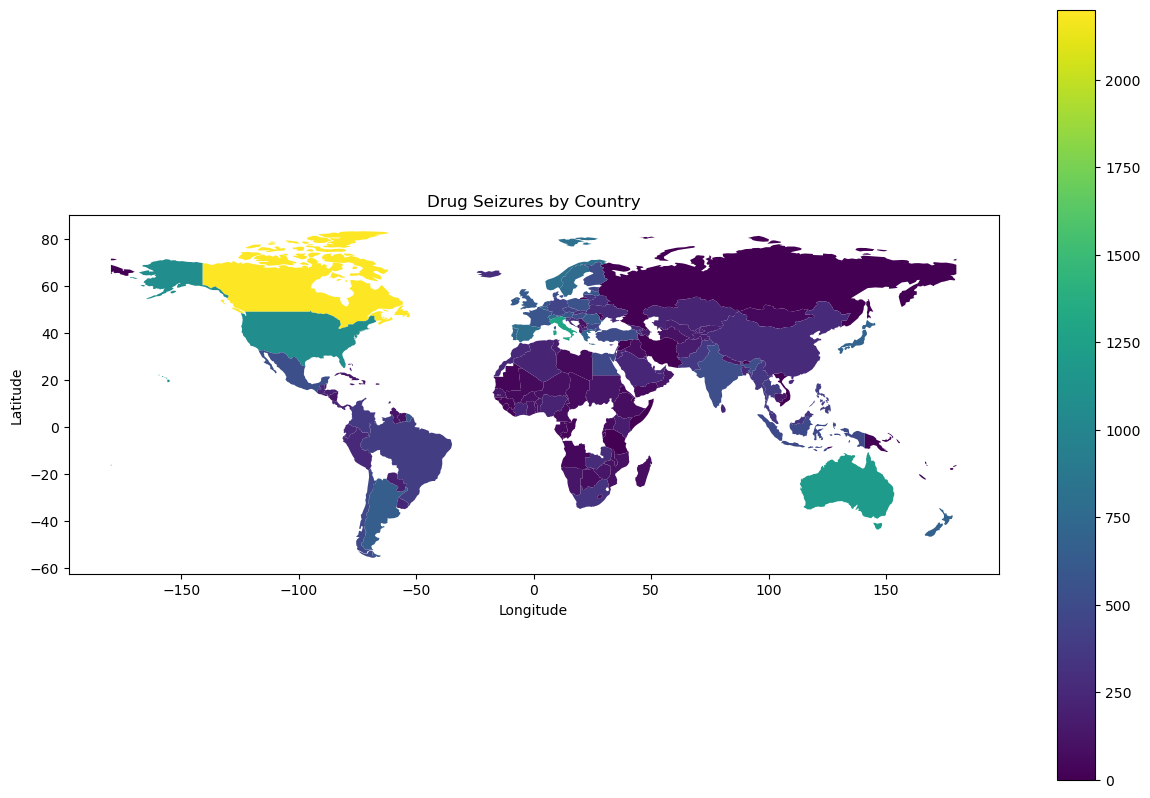

In [269]:
# Plotting the choropleth map
fig, ax = plt.subplots(figsize=(15, 10))
merged.plot(column='Seizure Count', ax=ax, legend=True)
ax.set_title('Drug Seizures by Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



In [270]:
cpi_list= {
"Algeria":34.5,
"Argentina":36.75,
"Australia":78.0,
"Austria":75.5,
"Bahrain":41.5,
"Belgium":76.0,
"Botswana":61.25,
"Bulgaria":41.75,
"Canada":82.0,
"Chile":67.5,
"Cameroon":25.75,
"Denmark":89.25,
"Egypt":34.25,
"Sweden":86.5,
"Afghanistan":14.25,
"Barbados":65.67,
"Benin":38.0,
"Bangladesh":26.25,
"Bahamas":65.33,
"Brazil":37.5,
"Colombia":36.75,
"Costa Rica":57.0,
"Cyprus":58.0,
"Djibouti":31.5,
"Ecuador":32.25,
"Finland":87.25,
"France":70.25,
"Greece":45.75,
"Guyana":34.5,
"Honduras":29.75,
"Hungary":47.5,
"Iceland":77.5,
"India":39.75,
"Indonesia":37.0,
"Ireland":73.75,
"Iraq":17.25,
"Israel":62.0,
"Italy":48.25,
"Jamaica":42.0,
"Japan":73.25,
"Jordan":49.5,
"Kenya":26.5,
"Kuwait":42.5,
"Lebanon":28.0,
"Lesotho":41.5,
"Luxembourg":82.25,
"Madagascar":25.75,
"Malaysia":48.25,
"Mauritius":52.0,
"Malta":56.25,
"Mauritania":28.25,
"Maldives":33.33,
"Mexico":29.5,
"Morocco":39.0,
"Myanmar":27.25,
"Nepal":29.5,
"Netherlands":82.75,
"Nigeria":27.0,
"Norway":85.5,
"New Zealand":89.25,
"Oman":46.5,
"Pakistan":31.75,
"Panama":37.75,
"Paraguay":28.75,
"Peru":35.75,
"Philippines":35.0,
"Poland":61.25,
"Portugal":63.25,
"Qatar":64.25,
"Republic of Korea":54.5,
"Romania":47.25,
"South Africa":43.75,
"Seychelles":60.33,
"Singapore":84.5,
"Somalia":9.25,
"Spain":57.75,
"Sri Lanka":37.25,
"Eswatini":38.5,
"Switzerland":85.5,
"Thailand":36.5,
"Togo":31.5,
"Trinidad and Tobago":39.0,
"Tunisia":41.0,
"Turkey":41.0,
"United Arab Emirates":69.25,
"United Kingdom":81.0,
"United States of America":74.0,
"Zambia":37.0,
"Burkina Faso":40.75,
"Central African Republic":23.25,
"Guatemala":27.75,
"Libya":16.0,
"Mozambique":26.5,
"Nicaragua":26.0,
"Senegal":44.75,
"Sudan":14.5,
"Cuba":47.0,
"Ghana":42.75,
"Cote d'Ivoire":34.25,
"Zimbabwe":21.75,
"Gambia":30.25,
"Haiti":19.75,
"Malawi":31.25,
"Burundi":20.0,
"China":39.25,
"Dominica":57.67,
"Gabon":33.0,
"Saudi Arabia":49.0,
"Guinea-Bissau":16.5,
"Mali":32.5,
"Papua New Guinea":27.5,
"Yemen":15.5,
"Brunei Darussalam":61.0,
"Ethiopia":34.0,
"Suriname":41.25,
"Uganda":25.5,
"Uruguay":71.25,
"Vanuatu":44.5,
"Chad":20.25,
"Guinea":26.75,
"El Salvador":35.75,
"Germany":80.75,
"Niger":34.0,
"Rwanda":54.75,
"Angola":17.75,
"Grenada":53.33,
"Namibia":52.25,
"Dominican Republic":30.75,
"North Macedonia":37.75,
"Belarus":40.0,
"Comoros":26.0,
"Sierra Leone":29.75,
"Tajikistan":24.25,
"Ukraine":29.5,
"Azerbaijan":28.75,
"Cambodia":20.75,
"Croatia":49.25,
"Equatorial Guinea":16.5,
"Estonia":71.0,
"Kazakhstan":29.75,
"Latvia":57.25,
"Lithuania":59.0,
"Slovenia":60.5,
"Armenia":34.5,
"Czechia":56.75,
"Turkmenistan":19.75,
"Uzbekistan":21.25,
"Kyrgyzstan":28.5,
"Bosnia and Herzegovina":38.25,
"Georgia":55.75,
"Albania":37.25,
"Cabo Verde":56.5,
"Mongolia":37.5,
"Eritrea":20.0,
"Liberia":34.25,
"Montenegro":45.0,
"Serbia":40.5,
"Bhutan":66.25,
"Iran":28.5,
"Korea, Dem. People's Rep.":12.75,
"Kosovo":36.25,
"Moldova":31.75,
"Russia":28.75,
"São Tomé and Príncipe":45.0,
"Solomon Islands":41.67,
"South Sudan":12.75,
"St. Lucia":56.67,
"St. Vincent and the Grenadines":58.67,
"Syria":14.5,
"Tanzania":33.5,
"Timor-Leste":34.0,
"Vietnam":33.0,

}

In [271]:
countries = []
cpi = []

for country, measure in cpi_list.items():
    countries.append(country)
    cpi.append(measure)
data = {
    'name': countries,
    'cpi': cpi,
}

cpi_gdf = gpd.GeoDataFrame(data)


In [272]:
#importing world map 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge 'world' GeoDataFrame with 'gdf' based on country names
merged = world.merge(cpi_gdf, how='left', left_on='name', right_on='name')
merged

C:\Users\koali\AppData\Local\Temp\ipykernel_5056\3761325655.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,cpi
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",33.50
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",82.00
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",74.00
...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",40.50
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",45.00
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",36.25
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",39.00


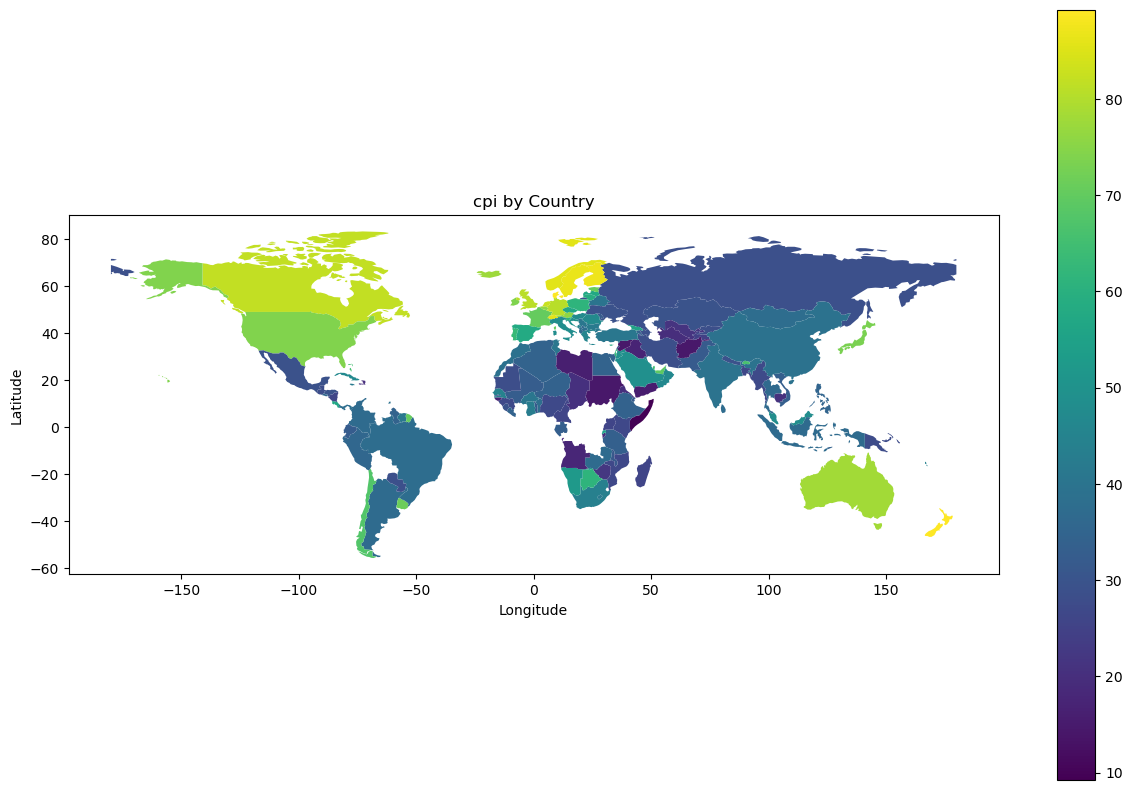

In [273]:
# Plotting the choropleth map
fig, ax = plt.subplots(figsize=(15, 10))
merged.plot(column='cpi', ax=ax, legend=True)
ax.set_title('cpi by Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()